# Day 2

### Today, we will start using nf-core pipelines to find differentially abundant genes in our dataset. 
### We are using data from the following paper: https://www.nature.com/articles/s41593-023-01350-3#Sec10

### 1. Please take some time to read through the paper and understand their approach, hypotheses and goals.

### What was the objective of the study?

The study examines the long-term effects of chronic oxycodone exposure and subsequent withdrawal in the context of chronic neuropathic pain in a mouse model.<br> 
Specifically, it explores how this exposure influences gene expression changes in key brain regions, including the nucleus accumbens, medial prefrontal cortex, and ventral tegmental area.<br>
Additionally, the study aims to determine whether inhibiting HDAC1/HDAC2 using the RBC1HI inhibitor could serve as a potential therapeutic strategy.


### What do the conditions mean?

**oxy** refers to the condition in which mice are treated with oxycodone. This is used to study the effects of chronic opioid exposure and withdrawal.


**sal** refers to a saline, a saltwater solution, that is used as a placebo/ control treatment.
<br><br>

###  What do the genotypes mean?

**SNI** refers to mice that underwent a surgical procedure that induces chronic neuropathic pain.<br>


**Sham** refers to a control procedure where the mice undergo surgery, but it does not cause nerve injury.
<br><br>

### Imagine you are the bioinformatician in the group who conducted this study. They hand you the raw files and ask you to analyze them.
### What would you do?

I would conduct a differential expression analysis to investigate the transcriptional effects of oxycodone exposure and <br>
chronic neuropathic pain, comparing gene expression changes between the different experimental conditions.
<br><br>

### Which groups would you compare to each other?
### Please also mention which outcome you would expect to see from each comparison.

1. SNI-Oxy vs. SNI-Sal<br>
- evaluating the effects of chronic oxycodone treatment in mice with spared nerve injury<br>
- expected Outcome:Significant differences in gene expression (indicating that oxycodone alters the transcriptomic profile in the presence of chronic neuropathic pain) & more pronounced withdrawal symptoms in SNI-Oxy compared to SNI-Sal. <br><br>

2. Sham-Oxy vs. Sham-Sal<br>
- evaluating the effects of oxycodone treatment in the absence of sham-operated mice<br>
- expected Outcome: less pronounced gene expression changes as there is no chronic neuropathic pain <br><br>

3. SNI-Sal vs. Sham-Sal<br>
- evaluating specific transcriptional changes associated with the pain condition alone<br>
- expected outcome: gene expression changes specifically related to chronic neuropathic pain 
<br><br>

4. SNI-Oxy vs. Sham-Sal<br>
- evaluating the effects of oxycodone treatment and spared nerve injury<br>
- expected outcome: gene expression changes similar but maybe amplified to what’s seen in SNI-Sal vs. Sham-Sal because of oxycodone
<br><br>

### Your group gave you a very suboptimal excel sheet (conditions_runs_oxy_project.xlsx) to get the information you need for each run they uploaded to the SRA.<br>
### So, instead of directly diving into downloading the data and starting the analysis, you first need to sort the lazy table.<br>
### Use Python and Pandas to get the table into a more sensible order.<br>
### Then, perform some overview analysis and plot the results

In [2]:
import pandas as pd
import openpyxl

#read the excel sheet
df = pd.read_excel('conditions_runs_oxy_project.xlsx',header=0)

#sort based on conditions and Run
sorted_data = df.sort_values(by=['Condition: Oxy', 'condition: Sal', 'Run'])

# reset the index after sorting
sorted_data.reset_index(drop=True, inplace=True)

# Display the sorted data
print("\nSorted Data:")
print(sorted_data)

# Save the DataFrame
sorted_data.to_excel('conditions_runs_oxy_project_sorted.xlsx', index=False)


Sorted Data:
   Patient          Run RNA-seq  DNA-seq condition: Sal Condition: Oxy  \
0        ?  SRR23195506       x      NaN            NaN              x   
1        ?  SRR23195508       x      NaN            NaN              x   
2        ?  SRR23195509       x      NaN            NaN              x   
3        ?  SRR23195511       x      NaN            NaN              x   
4        ?  SRR23195514       x      NaN            NaN              x   
5        ?  SRR23195516       x      NaN            NaN              x   
6        ?  SRR23195517       x      NaN            NaN              x   
7        ?  SRR23195519       x      NaN            NaN              x   
8        ?  SRR23195505       x      NaN              x            NaN   
9        ?  SRR23195507       x      NaN              x            NaN   
10       ?  SRR23195510       x      NaN              x            NaN   
11       ?  SRR23195512       x      NaN              x            NaN   
12       ?  SRR23195513 

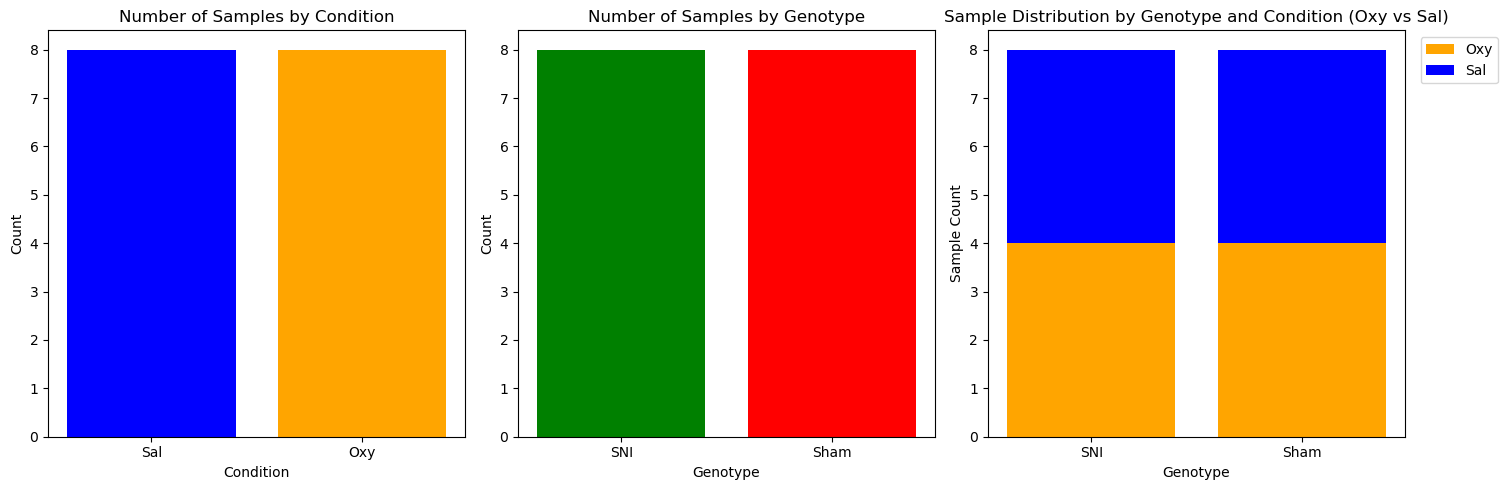

In [3]:
import matplotlib.pyplot as plt
import numpy as np

condition_counts = {
    'Sal': sorted_data['condition: Sal'].value_counts()['x'],
    'Oxy': sorted_data['Condition: Oxy'].value_counts()['x']
}

# Count the number of samples for each genotype
genotype_counts = {
    'SNI': sorted_data['Genotype: SNI'].value_counts()['x'],
    'Sham': sorted_data['Genotype: Sham'].value_counts()['x']
}

SNI_Oxy_count = len(sorted_data[(sorted_data['Genotype: SNI'] == 'x') & (sorted_data['Condition: Oxy'] == 'x')])
SNI_Sal_count = len(sorted_data[(sorted_data['Genotype: SNI'] == 'x') & (sorted_data['condition: Sal'] == 'x')])
Sham_Oxy_count = len(sorted_data[(sorted_data['Genotype: Sham'] == 'x') & (sorted_data['Condition: Oxy'] == 'x')])
Sham_Sal_count = len(sorted_data[(sorted_data['Genotype: Sham'] == 'x') & (sorted_data['condition: Sal'] == 'x')])

genotypes = ['SNI', 'Sham']
oxy_counts = [SNI_Oxy_count, Sham_Oxy_count]
sal_counts = [SNI_Sal_count, Sham_Sal_count]

# Plot the counts of samples for conditions and genotypes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot condition counts
ax[0].bar(condition_counts.keys(), condition_counts.values(), color=['blue', 'orange'])
ax[0].set_title('Number of Samples by Condition')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Condition')

# Plot genotype counts
ax[1].bar(genotype_counts.keys(), genotype_counts.values(), color=['green', 'red'])
ax[1].set_title('Number of Samples by Genotype')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Genotype')

ax[2].bar(genotypes, oxy_counts, label='Oxy', color='orange')
ax[2].bar(genotypes, sal_counts, bottom=oxy_counts, label='Sal', color='blue')
ax[2].set_title('Sample Distribution by Genotype and Condition (Oxy vs Sal)')
ax[2].set_ylabel('Sample Count')
ax[2].set_xlabel('Genotype')
ax[2].legend(bbox_to_anchor=(1.24, 1), loc='upper right')

plt.tight_layout()
plt.show()

### 1. How many samples do you have per condition?

In [4]:

print(f"There are {condition_counts['Sal']} samples for the sal conition and {condition_counts['Oxy']} samples for the oxy condition.")

There are 8 samples for the sal conition and 8 samples for the oxy condition.


### 2. How many samples do you have per genotype?

In [5]:
print(f"There are {genotype_counts['SNI']} samples for the SIN genotype and {genotype_counts['Sham']} samples for the Sham genotype.")

There are 8 samples for the SIN genotype and 8 samples for the Sham genotype.


### 3. How often do you have each condition per genotype?

In [6]:
print(f"There are {SNI_Sal_count} samples for the SIN genotype under the sal condition.")
print(f"There are {Sham_Sal_count} samples for the Sham genotype under the sal condition.")
print(f"There are {SNI_Oxy_count} samples for the SIN genotype under the oxy condition.")
print(f"There are {Sham_Oxy_count} samples for the Sham genotype under the oxy condition.")

There are 4 samples for the SIN genotype under the sal condition.
There are 4 samples for the Sham genotype under the sal condition.
There are 4 samples for the SIN genotype under the oxy condition.
There are 4 samples for the Sham genotype under the oxy condition.


### They were so kind to also provide you with the information of the number of bases per run, so that you can know how much space the data will take on your Cluster.<br>
### Add a new column to your fancy table with this information (base_counts.csv) and sort your dataframe according to this information and the condition.

In [9]:
#read file
df_base_counts = pd.read_csv('base_counts.csv',header=0)

# Merge the DataFrames on the 'Run' column 
merged_data = pd.merge(df, df_base_counts, on='Run', how='inner')

# Sort the DataFrame by 'Base_Count' and then by condition
sorted_data = merged_data.sort_values(by=['Bases', 'Condition: Oxy'], ascending=[True, True])

# reset the index after sorting
sorted_data.reset_index(drop=True, inplace=True)

# Display the sorted data
print("\nSorted Data with Base Counts:")

print(sorted_data)

# Save the DataFrame
sorted_data.to_excel('conditions_runs_oxy_project_sorted_with_bases.xlsx', index=False)



Sorted Data with Base Counts:
   Patient          Run RNA-seq  DNA-seq condition: Sal Condition: Oxy  \
0        ?  SRR23195516       x      NaN            NaN              x   
1        ?  SRR23195511       x      NaN            NaN              x   
2        ?  SRR23195517       x      NaN            NaN              x   
3        ?  SRR23195505       x      NaN              x            NaN   
4        ?  SRR23195508       x      NaN            NaN              x   
5        ?  SRR23195519       x      NaN            NaN              x   
6        ?  SRR23195509       x      NaN            NaN              x   
7        ?  SRR23195514       x      NaN            NaN              x   
8        ?  SRR23195510       x      NaN              x            NaN   
9        ?  SRR23195512       x      NaN              x            NaN   
10       ?  SRR23195520       x      NaN              x            NaN   
11       ?  SRR23195506       x      NaN            NaN              x   
12     

### Then select the 2 smallest runs from your dataset and download them from SRA (maybe an nf-core pipeline can help here?...)

In [11]:
# filter the 2 smallest runs
df_filtered = sorted_data[['Run']].head(2)

# rename the column 
df_filtered.rename(columns={'Run': 'sample'}, inplace=True)

# Save the filtered DataFrame to a CSV file
df_filtered.to_csv('filtered_runs.csv', index=False, header=False)
df_filtered.to_csv('filtered_runs_with_header.csv', index=False, header=True)


The files were also provided by the tutors as the download took really long.

In [8]:
! nextflow run nf-core/fetchngs --input 'filtered_runs.csv' --outdir 'SRA_runs' -profile docker

Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.0
Launching `https://github.com/nf-core/fetchngs` [elated_avogadro] DSL2 - revision: 8ec2d934f9 [master]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/fetchngs v1.12.0-g8ec2d93
------------------------------------------------------
Core Nextflow options
  revision       : master
  runName        : elated_avogadro
  containerEngine: docker
  launchDir      : /home/maikenaegele/Computational Workflow/Sheet 2
  workDir        : /home/maikenaegele/Computational Workflow/Sheet 2/work
  projectD

### While your files are downloading, get back to the paper and explain how you would try to reproduce the analysis.<br>
### When you are done with this shout, so we can discuss the different ideas.

The paper focused on the transcriptional expression comparison of genes between different condtions and genotypes.<br>
Therefore, the most plausibel way to reproduce the analysis is to perform a differential expression analysis using using nf-core pipelines. 